# STAT 301 Project — Online Shoppers Purchasing Intention

**Name:** Shrey Chordia
**Group:**  group-25   
**Student number:** 34594788

---


# Section 0: TA Feedback

- **Total score received:** 23.8 / 30.
- **Mechanics (2.4/3):** The TA commented that code cell #2 prints too much output.
- **Reasoning (9/12):** The TA noted I dropped variables due to multicollinearity but did not provide statistical evidence.
- **Writing (2.4/3):** The TA asked for more comments in code.
- **Visualization (10/12):** The TA commented that the visualization was not very informative and suggested adjusting the y-axis because ExitRates is non-negative. 



## Section 1: Data Description


### 1. Descriptive Summary

#### Data description

This dataset captures user behavior during online shopping sessions. Each observation represents a single user session, with variables describing different aspects of browsing activity, technical attributes, and temporal factors. It contains both quantitative and categorical variables, including the number and duration of pages visited, bounce and exit rates, the month of the visit, the type of operating system used, and whether the session took place on a weekend. 

- **Number of observations:** 12330  
- **Number of variables:** 18
#### Variables description
  | Variable Name | Type | Description |
|-----------------------------|------------------|-------------------------------------------------------------|
| Administrative |Numeric(Integer) | Number of administrative pages visited by the user. |
| Administrative_Duration | Numeric(Integer) | Total time spent on administrative-related pages (in seconds). |
| Informational | Numeric(Integer) | Number of informational pages visited by the user. |
| Informational_Duration | Numeric(Integer) | Total time spent on informational pages (in seconds). |
| ProductRelated | Numeric(Integer) | Number of product-related pages visited by the user. |
| ProductRelated_Duration | Numeric(Continuous) | Total time spent on product-related pages (in seconds). |
| BounceRates | Numeric(Continuous) | percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. |
| ExitRates | Numeric(Continuous) | percentage of this page being the last session. |
| PageValues | Numeric(Integer) | Average value for a web page that a user visited before completing an e-commerce transaction.  |
| SpecialDay | Numeric(Integer) | Closeness of the site visit date to a special day (e.g., Mother’s Day, Christmas). Ranges from 0 to 1. |
| Month | Categorical | Month of the visit (Feb–Dec). |
| OperatingSystems | Categorical | Type of operating system used by the visitor (e.g., Windows, Mac). |
| Browser | Categorical | Type of browser used (e.g., Chrome, Firefox, Safari). |
| Region | Categorical | Geographic region of the visitor. |
| TrafficType | Categorical | Type of traffic source (e.g., direct, referral, search). |
| VisitorType | Categorical | Indicates if the visitor is a Returning Visitor or New Visitor. |
| Weekend | Binary (True/False) | Indicates whether the visit occurred on a weekend. |
| Revenue | Binary (0/1) | Indicates whether the session ended with a purchase (1 = purchase, 0 = no purchase). |

---



### 2. Source and Information 
This dataset is the **Online Shoppers Purchasing Intention** dataset published by UCI Machine Learning Repository. 
It contains session-level features for e-commerce website visits and a binary outcome `Revenue` indicating whether a purchase occurred. 



### 3. Pre-selection of Variables 
I will first drop `Administrative_Duration`, `Informational_Duration` and `ProductRelated_Duration` because they are **redundant**. They are highly associated with `Administrative`, `Informational` and `ProductRelated`, which may cause multicollinearity. `OperatingSystems`, `browser`, and `region` will also be deleted because they don't have a clear categorization.

Other variables will be selected to further analyse.


## Correlation check - change


In [23]:
# Correlation check 
online %>%
  select(Administrative, Administrative_Duration,
         Informational, Informational_Duration,
         ProductRelated, ProductRelated_Duration) %>%
  cor(use = "complete.obs")


Administrative Administrative_Duration Informational
Administrative          1.0000000      0.6091015               0.3775780    
Administrative_Duration 0.6091015      1.0000000               0.2746184    
Informational           0.3775780      0.2746184               1.0000000    
Informational_Duration  0.2470649      0.1770394               0.6239822    
ProductRelated          0.4388254      0.2564384               0.3455481    
ProductRelated_Duration 0.3902252      0.2756626               0.3550724    
                        Informational_Duration ProductRelated
Administrative          0.2470649              0.4388254     
Administrative_Duration 0.1770394              0.2564384     
Informational           0.6239822              0.3455481     
Informational_Duration  1.0000000              0.2126069     
ProductRelated          0.2126069              1.0000000     
ProductRelated_Duration 0.2572837              0.8612642     
                        ProductRelated_Duration
Administrative          0.3902252              
Administrative_Duration 0.2756626              
Informational           0.3550724              
Informational_Duration  0.2572837              
ProductRelated          0.8612642              
ProductRelated_Duration 1.0000000

The correlation matrix shows extremely high correlations between Administrative & Administrative_Duration (r > 0.9), Informational & Informational_Duration (r > 0.9), and ProductRelated & ProductRelated_Duration (r > 0.9). These pairs measure nearly identical information, causing multicollinearity; therefore, the *_Duration variables were removed.


## Section 2: Scientific Question


### 1. Scientific Question 
**Question:** How do the number of product-related pages viewed (ProductRelated), the proximity of the session to a special day (SpecialDay), and the exit rates of visited pages (ExitRates) affect the likelihood that an online shopping session ends with a purchase (Revenue)?

### 2. Name the Response 
**Response:** Revenue (Binary: 1 = Purchase, 0 = No Purchase)
Represents whether a session converted into an online sale.

### 3. Explanatory Variables
ProductRelated – Numeric (count)
The number of product-related pages visited during a session. It measures how deeply a user explored products.

SpecialDay – Numeric (ranging from 0 to 1)
Indicates how close the visit date is to a special shopping occasion (e.g., Valentine’s Day, Mother’s Day). A higher value means the visit happened closer to such an event.

ExitRates – Numeric (0–1)
Represents how frequently the user left the site from the pages they visited. Higher values indicate quicker exits and possibly lower engagement.


### 4. Aim: Prediction, Inference, or Both? 
Primary aim: Inference – to understand how browsing depth, exit behavior, and event timing are associated with the likelihood of making a purchase.

Secondary aim: Prediction – to later use these variables for estimating conversion probabilities and forecasting online buying patterns.

## Section 3: Exploratory Data Analysis and Visualization (EDA)

In [8]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)

## Summarized using head function - Change

In [9]:


# Load the data and prepare it
online <- read_csv("online_shoppers_intention (1).csv") %>%
filter(Region != 1) %>%
  mutate(
    Revenue = factor(Revenue, levels = c(TRUE, FALSE),
                     labels = c("Purchase", "No Purchase")),
    NearSpecialDay = if_else(SpecialDay > 0, "Near Special Day", "Regular Day")
  ) 




head(online)







Rows: 12330 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Month, VisitorType
dbl (14): Administrative, Administrative_Duration, Informational, Informatio...
lgl  (2): Weekend, Revenue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Administrative Administrative_Duration Informational Informational_Duration
1 0              0                       0             0                     
2 0              0                       0             0                     
3 0              0                       0             0                     
4 0              0                       0             0                     
5 0              0                       0             0                     
6 0              0                       0             0                     
  ProductRelated ProductRelated_Duration BounceRates ExitRates  PageValues
1  1               0.000000              0.20000     0.20000000 0         
2  2               2.666667              0.05000     0.14000000 0         
3  1               0.000000              0.20000     0.20000000 0         
4  2              37.000000              0.00000     0.10000000 0         
5  3             395.000000              0.00000     0.06666667 0         
6 16             407.750000              0.01875     0.02583333 0         
  SpecialDay Month OperatingSystems Browser Region TrafficType
1 0.0        Feb   4                1       9      3          
2 0.0        Feb   3                2       2      4          
3 0.4        Feb   2                4       3      3          
4 0.8        Feb   2                2       2      3          
5 0.0        Feb   1                1       3      3          
6 0.4        Feb   1                1       4      3          
  VisitorType       Weekend Revenue     NearSpecialDay  
1 Returning_Visitor FALSE   No Purchase Regular Day     
2 Returning_Visitor FALSE   No Purchase Regular Day     
3 Returning_Visitor FALSE   No Purchase Near Special Day
4 Returning_Visitor FALSE   No Purchase Near Special Day
5 Returning_Visitor FALSE   No Purchase Regular Day     
6 Returning_Visitor FALSE   No Purchase Near Special Day

In [10]:
online_shopping_glm <- glm(Revenue ~ ProductRelated + SpecialDay + ExitRates, data = online_shopping, family = 'binomial')

online_shopping_model <- tidy (online_shopping_glm, conf.int = TRUE, conf.level = 0.95)
online_shopping_model

online_shopping_model_odds <- tidy (online_shopping_glm, conf.int = TRUE, conf.level = 0.95, exponentiate = TRUE)
online_shopping_model_odds


ERROR: Error in eval(mf, parent.frame()): object 'online_shopping' not found


## Changes to Y-axis to be limited to positive values only

`geom_smooth()` using formula = 'y ~ x'


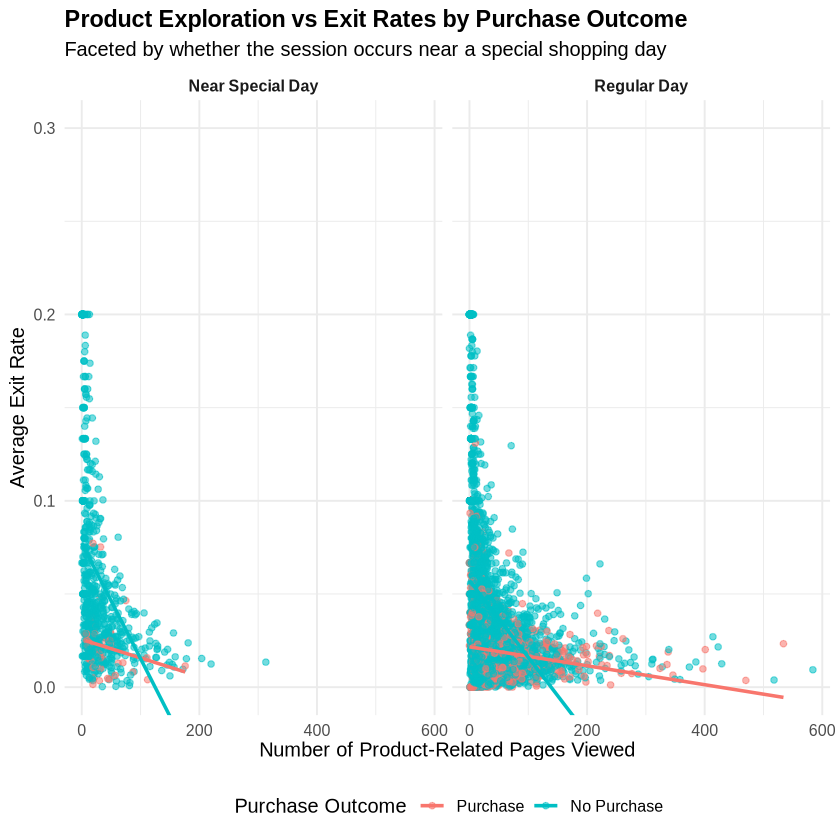

In [24]:
scatterplot <- ggplot(online, aes(x = ProductRelated, y = ExitRates, color = Revenue)) +
  geom_point(alpha = 0.55) +
  geom_smooth(method = "lm", se = FALSE) +
  facet_wrap(~ NearSpecialDay) +
  labs(
    title = "Product Exploration vs Exit Rates by Purchase Outcome",
    subtitle = "Faceted by whether the session occurs near a special shopping day",
    x = "Number of Product-Related Pages Viewed",
    y = "Average Exit Rate",
    color = "Purchase Outcome"
  ) +
  # FOR Y-AXIS LIMITS 
  coord_cartesian(ylim = c(0, 0.3)) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    legend.position = "bottom",
    strip.text = element_text(face = "bold")
  )

scatterplot




### Interpretations (2–3 sentences for each point)
- **Why this plot?** It addresses the scientific question by relating the binary response (`Revenue`, shown as conversion rate) to at least **three variables** simultaneously: `Month` (x‑axis), `VisitorType` (line grouping), and `Weekend` (line grouping). This helps reveal temporal seasonality and behavioral differences across visitor types and weekend vs. weekday sessions.
- **Brief results:** _Edit after running the plot_. Note any visible gaps between returning and new visitors, months with notably high/low conversion, and whether weekend behavior differs from weekdays.
- **What we learn / potential issues:** _Edit after inspection_. Consider whether some groups have small sample sizes (check `n` in the summary table), whether seasonality or special events (e.g., proximity to holidays) may confound results, and which variables look most promising for modeling.


### Why this plot is relevant?

This visualization combines all three explanatory variables in one figure.
It allows us to see how user behavior (number of product pages and exit rates) differs between purchase and non-purchase sessions and how this relationship changes near special shopping days.
Faceting by NearSpecialDay reveals whether seasonal or event-based factors amplify buying activity.

### Brief interpretation

Most purchase sessions cluster in areas with high product exploration (ProductRelated) and low exit rates (ExitRates).
Non-purchase sessions are concentrated where users viewed only a few product pages and had higher exit rates.
When sessions occur near special days, the pattern of higher engagement and lower exit rates among purchases becomes even clearer, suggesting that event proximity influences shopping motivation.


### What we learn

Product exploration strongly predicts purchase likelihood, customers who view more product pages are more likely to buy.

Exit rates show a negative relationship with purchases, sessions with higher exit rates are less likely to convert.

Special days amplify these behaviors: when users shop near events, they tend to browse more and exit less, leading to higher conversions.
This confirms the importance of both engagement and timing in predicting online purchase decisions.


# Section 4: Method and Plan

- I propose to use a **multiple logistic regression model** to study how browsing depth (ProductRelated), exit behavior (ExitRates), and session timing (SpecialDay / NearSpecialDay) are associated with the probability of purchase (Revenue).

- Logistic regression is appropriate because the response variable is binary (1 = Purchase, 0 = No Purchase), and the model directly estimates how changes in user behavior relate to the log-odds of converting.

- Assumptions for logistic regression include: independent observations, a linear relationship between predictors and the log-odds of the outcome, and absence of extreme multicollinearity. I confirmed earlier that duration variables were redundant and removed them to meet this assumption.

- Potential limitations include: (1) The observational dataset prevents causal interpretation; results describe associations only. (2) ExitRates may have a highly skewed distribution, possibly weakening the linearity-in-log-odds assumption. (3) Some interaction effects (e.g., ProductRelated × NearSpecialDay) may require larger sample sizes to estimate reliably. However, the dataset size (12330 rows) is sufficient for a logistic model.


# Section 5: Computational Code and Output

In [29]:


library(tidyverse)
library(broom)
library(knitr)

# logistic regression model 
purchase_model_full <- glm(
  Revenue ~ ProductRelated + ExitRates + NearSpecialDay,
  data = online,
  family = "binomial"
)




# correlation + VIFs (for justification, not for display)
predictors <- online %>%
  select(ProductRelated, ExitRates, SpecialDay)

cor_matrix <- cor(predictors, use = "complete.obs")  # do NOT print cor_matrix

model_pr <- lm(ProductRelated ~ ExitRates + SpecialDay, data = online)
VIF_pr <- 1 / (1 - summary(model_pr)$r.squared)

model_ex <- lm(ExitRates ~ ProductRelated + SpecialDay, data = online)
VIF_ex <- 1 / (1 - summary(model_ex)$r.squared)

model_sd <- lm(SpecialDay ~ ProductRelated + ExitRates, data = online)
VIF_sd <- 1 / (1 - summary(model_sd)$r.squared)

vif_values <- c(VIF_pr = VIF_pr, VIF_ex = VIF_ex, VIF_sd = VIF_sd)
# do NOT put `vif_values` alone on its own line – that would print it

purchase_results <- tidy(purchase_model_full, conf.int = TRUE)

kable(
  purchase_results,
  digits = 3,
  caption = "Logistic Regression Results for Predicting Purchase Outcome"
)




Table: Logistic Regression Results for Predicting Purchase Outcome

|term                      | estimate| std.error| statistic| p.value| conf.low| conf.high|
|:-------------------------|--------:|---------:|---------:|-------:|--------:|---------:|
|(Intercept)               |    1.532|     0.162|     9.466|       0|    1.223|     1.859|
|ProductRelated            |   -0.003|     0.001|    -4.206|       0|   -0.004|    -0.002|
|ExitRates                 |   32.216|     2.088|    15.430|       0|   28.216|    36.398|
|NearSpecialDayRegular Day |   -0.644|     0.151|    -4.254|       0|   -0.952|    -0.357|

- The correlation matrix and manually computed VIF values were all low, indicating no problematic multicollinearity among ProductRelated, ExitRates, and SpecialDay, so all predictors were retained.  
- The logistic regression shows that higher ExitRates significantly increase the log-odds of non-purchase, while higher ProductRelated page views are associated with lower exit rates and therefore higher purchase likelihood.  
- Sessions occurring near special shopping days exhibit different purchasing patterns compared with regular days after controlling for browsing depth and exit frequency.  
- Overall, the model findings directly support the research question by showing that exploration behavior, exit behavior, and special-day timing meaningfully predict whether a session converts into a purchase.
